# Scikit-Learn 맛보기
### Iris 분류 - 결정 트리

### 1) 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# class 이름(y)
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# feature 이름(X)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
# feature data - X, numpy dimensional array, 150x4
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
iris.data[145:]

array([[6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [9]:
# Data Frame으로 만들어 탐색
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
df['target'] = iris.target
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [11]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [12]:
# iris 데이터에 대한 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
df.groupby('target').describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [14]:
df.groupby('target').agg(['mean','std'])

sepal length (cm)           sepal width (cm)            \
                    mean       std             mean       std   
target                                                          
0                  5.006  0.352490            3.428  0.379064   
1                  5.936  0.516171            2.770  0.313798   
2                  6.588  0.635880            2.974  0.322497   

       petal length (cm)           petal width (cm)            
                    mean       std             mean       std  
target                                                         
0                  1.462  0.173664            0.246  0.105386  
1                  4.260  0.469911            1.326  0.197753  
2                  5.552  0.551895            2.026  0.274650

In [15]:
# 데이터 시각화 - Box plot으로 분포가 어떤지 확인
import matplotlib.pyplot as plt
setosa = df[:50]

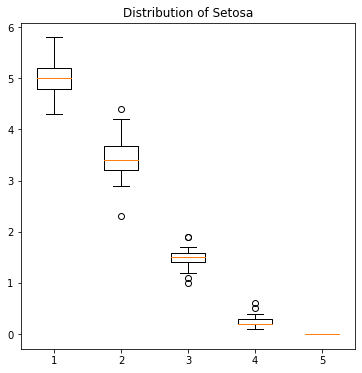

In [17]:
plt.figure(figsize=(6,6))
plt.boxplot(setosa.T)
plt.title('Distribution of Setosa')
plt.show()

### 2) 학습과 데스트 데이터로 분리

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(    # train : test = 3 : 1
    iris.data, iris.target, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [22]:
import numpy as np

np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([34, 36, 42]))

- y 값의 분포를 균등하게 하려면: stratify option

In [23]:
X_train, X_test, y_train, y_test = train_test_split(    
    iris.data, iris.target, random_state=2021, stratify=iris.target
)
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([37, 37, 38]))

- test data 비율: test_size option

In [24]:
X_train, X_test, y_train, y_test = train_test_split(    
    iris.data, iris.target, random_state=2021, stratify=iris.target, test_size=0.2
)
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

### 3) 학습 - 결정 트리

In [25]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
# 모델 사용 - 객체 생성
dtc = DecisionTreeClassifier(random_state=2022)

In [27]:
# 모델 하이퍼 파라메터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [28]:
# 결정 트리 모델이 학습 - 데이터로 훈련용 피쳐 데이터와 레이블을 제공
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

### 4) 예측 수행

In [29]:
pred = dtc.predict(X_test)
pred[:5]

array([0, 1, 2, 2, 0])

In [31]:
dfp = pd.DataFrame(X_test, columns=iris.feature_names)
dfp['target'] = y_test
dfp['predict'] = pred
dfp.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
0,5.1,3.7,1.5,0.4,0,0
1,5.5,2.5,4.0,1.3,1,1
2,6.7,3.0,5.0,1.7,1,2
3,7.2,3.2,6.0,1.8,2,2
4,4.8,3.1,1.6,0.2,0,0


In [32]:
dfp.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,predict
25,4.6,3.6,1.0,0.2,0,0
26,5.6,2.7,4.2,1.3,1,1
27,6.6,3.0,4.4,1.4,1,1
28,6.5,3.0,5.5,1.8,2,2
29,4.4,3.2,1.3,0.2,0,0


### 5) 평가 - 정확도(accuracy)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9

In [34]:
# 4)와 5)의 과정을 한꺼번에
dtc.score(X_test, y_test)

0.9